In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import unicodedata
import os
from pandas_profiling import ProfileReport
from helperFunctions import *

In [2]:
#get local directory
filePath = os.path.join('Data','Preprocessing','NoShowAppointments_Kaggle_May2016.csv')
appt_data = pd.read_csv(filePath,parse_dates=['ScheduledDay','AppointmentDay'])

In [3]:
#explore data
appt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [4]:
#review data information for each numeric column
appt_data.describe()  

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#change column name
appt_data.rename(columns={"Hipertension" : "Hypertension"
                          ,"SMS_received" : "SMSReceived"
                          ,"No-show" : "NoShow"
                          ,"Neighbourhood" : "Neighborhood"
                          ,"Handcap" : "Handicap"}
                 ,inplace=True)
appt_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#show handicap counts
appt_data['Handicap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [7]:
#change all handicap values greater than 1 to 1
appt_data['Handicap'].replace(2,1,inplace=True)
appt_data['Handicap'].replace(3,1,inplace=True)
appt_data['Handicap'].replace(4,1,inplace=True)

In [8]:
#show handicap counts
appt_data['Handicap'].value_counts()

0    108286
1      2241
Name: Handicap, dtype: int64

In [9]:
# Get patients less than an age of zero
indexNames = appt_data[ appt_data['Age'] < 0 ].index
# Delete these row indexes from dataFrame
appt_data.drop(indexNames , inplace=True)

In [10]:
# cut age groups into categories
category = pd.cut(appt_data.Age,bins=[0,2,17,65,appt_data.Age.max()],labels=['Toddler/baby','Child','Adult','Elderly'])
appt_data.insert(5,'Age Group',category)

In [11]:
#show age group value counts
appt_data['Age Group'].value_counts()

Adult           69846
Child           19949
Elderly         13301
Toddler/baby     3891
Name: Age Group, dtype: int64

In [12]:
#show patientid
appt_data['PatientId'].head()

0    2.987250e+13
1    5.589978e+14
2    4.262962e+12
3    8.679512e+11
4    8.841186e+12
Name: PatientId, dtype: float64

In [13]:
#explore missing values for object data types
appt_data.select_dtypes(include='object').isnull().sum()

Gender          0
Neighborhood    0
NoShow          0
dtype: int64

In [14]:
#set NoShow to a number value
appt_data['NoShow'].replace('No',0,inplace=True)
appt_data['NoShow'].replace('Yes',1,inplace=True)

#explore missing values for object data types
appt_data.select_dtypes(include='number').isnull().sum()

PatientId        0
AppointmentID    0
Age              0
Scholarship      0
Hypertension     0
Diabetes         0
Alcoholism       0
Handicap         0
SMSReceived      0
NoShow           0
dtype: int64

In [15]:
#look at gender counts
appt_data['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [16]:
#show age value counts
appt_data['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [17]:
#show neighborhood counts
appt_data['Neighborhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighborhood, Length: 81, dtype: int64

In [18]:
# population a new column for the scheduled time of the day
appt_data['Neighborhood'] = appt_data.apply(lambda x: remove_neighborhood_accent(x['Neighborhood']),axis=1)

In [19]:
# show neighborhood counts
appt_data['Neighborhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTENCIA                    4431
JARDIM DA PENHA                3877
ITARARE                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEANICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighborhood, Length: 81, dtype: int64

In [20]:
#get unique Neighborhood values
len(appt_data['Neighborhood'].unique())

81

In [21]:
# making boolean series for a team name 
no_show = appt_data['NoShow']==1

# group data by no show 
appt_data[no_show].groupby('PatientId').sum()[['NoShow']]


,NoShow
PatientId,
5.628261e+06,1
6.485121e+07,1
8.799645e+07,1
1.224513e+08,2
1.421333e+08,1
...,...
9.988130e+14,1
9.994717e+14,1
9.994792e+14,2


In [22]:
# run same_day_appt function against ScheduledDay and AppointmentDay
appt_data['SameDayAppointment'] = appt_data.apply(lambda x: same_day_appt(x['ScheduledDay'],x['AppointmentDay']),axis=1)

# run another apply statement to determine the day of the week
appt_data['AppointmentDayOfWeek'] = appt_data.apply(lambda x: appt_day_name(x['AppointmentDay']),axis=1)

# population a new column for the scheduled time of the day
appt_data['ScheduledTimeOfDay'] = appt_data.apply(lambda x: scheduled_time_of_day(x['ScheduledDay']),axis=1)


In [23]:
# view Same Day Appointment Data
appt_data['ScheduledTimeOfDay'].head(10)

0      Evening
1      Evening
2      Evening
3      Evening
4      Evening
5      Morning
6    Afternoon
7    Afternoon
8      Morning
9    Afternoon
Name: ScheduledTimeOfDay, dtype: object

In [24]:
# see scheduled time of day
appt_data['ScheduledTimeOfDay'].value_counts()

Morning      68480
Afternoon    31664
Evening      10382
Name: ScheduledTimeOfDay, dtype: int64

In [25]:
# add weather data to appointments
# notice the last two columns 
add_weather_data(appt_data)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age Group,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,SameDayAppointment,AppointmentDayOfWeek,ScheduledTimeOfDay,RainClassification,NormalVersusActualTempAverage
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,Adult,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1,Friday,Evening,1,below
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,Adult,56,JARDIM DA PENHA,0,0,0,0,0,0,0,1,Friday,Evening,1,below
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,Adult,62,MATA DA PRAIA,0,0,0,0,0,0,0,1,Friday,Evening,1,below
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,Child,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1,Friday,Evening,1,below
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,Adult,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1,Friday,Evening,1,below
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,Adult,56,MARIA ORTIZ,0,0,0,0,0,1,0,0,Tuesday,Morning,1,above
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,Adult,51,MARIA ORTIZ,0,0,0,0,0,1,0,0,Tuesday,Morning,1,above
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,Adult,21,MARIA ORTIZ,0,0,0,0,0,1,0,0,Tuesday,Evening,1,above
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,Adult,38,MARIA ORTIZ,0,0,0,0,0,1,0,0,Tuesday,Afternoon,1,above


In [26]:
#show the counts by rain classification
#rainclassification = 1 is no rain, anything higher than 1 means rain
appt_data['RainClassification'].value_counts()

1    93555
2    12577
3     4394
Name: RainClassification, dtype: int64

In [27]:
#show the counts by normal versus actual temp average
appt_data['NormalVersusActualTempAverage'].value_counts()

above    53051
same     29238
below    28237
Name: NormalVersusActualTempAverage, dtype: int64

In [29]:
#create profile before one hot encoding data
profile = ProfileReport(appt_data, title='Pandas Profiling Report', html={'style':{'full_width':True}})

#add profile to file
profile.to_file(output_file=os.path.join('Visualizations','Appt_Data_Report.html'))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [30]:
#create dummy classifications (e.g. one hot encoding)
#columns with classification values will get multiple columns created
appt_data = pd.get_dummies(appt_data)

In [31]:
appt_data.columns

Index(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       ...
       'AppointmentDayOfWeek_Saturday', 'AppointmentDayOfWeek_Thursday',
       'AppointmentDayOfWeek_Tuesday', 'AppointmentDayOfWeek_Wednesday',
       'ScheduledTimeOfDay_Afternoon', 'ScheduledTimeOfDay_Evening',
       'ScheduledTimeOfDay_Morning', 'NormalVersusActualTempAverage_above',
       'NormalVersusActualTempAverage_below',
       'NormalVersusActualTempAverage_same'],
      dtype='object', length=113)

In [32]:
#show no show count by patient itd
appt_data['NoShowSum'] = appt_data.groupby('PatientId')['NoShow'].transform('sum')

In [33]:
#see those with no show sum over 1
appt_data[appt_data['NoShowSum']>1]

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,AppointmentDayOfWeek_Thursday,AppointmentDayOfWeek_Tuesday,AppointmentDayOfWeek_Wednesday,ScheduledTimeOfDay_Afternoon,ScheduledTimeOfDay_Evening,ScheduledTimeOfDay_Morning,NormalVersusActualTempAverage_above,NormalVersusActualTempAverage_below,NormalVersusActualTempAverage_same,NoShowSum
7,3.449833e+12,5630575,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,2
20,6.222575e+14,5626083,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,2
21,1.215484e+13,5628338,2016-04-27 10:50:45+00:00,2016-04-29 00:00:00+00:00,4,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
27,1.215484e+13,5628345,2016-04-27 10:51:45+00:00,2016-04-29 00:00:00+00:00,4,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
37,1.578132e+12,5637986,2016-04-29 07:35:56+00:00,2016-04-29 00:00:00+00:00,64,1,1,1,0,0,...,0,0,0,0,0,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110454,6.142460e+11,5772400,2016-06-03 15:18:44+00:00,2016-06-03 00:00:00+00:00,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,2
110484,5.133650e+14,5772155,2016-06-03 14:43:56+00:00,2016-06-07 00:00:00+00:00,45,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,2
110492,6.456342e+14,5786741,2016-06-08 08:50:19+00:00,2016-06-08 00:00:00+00:00,33,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,2
110496,8.544295e+13,5779046,2016-06-06 17:35:38+00:00,2016-06-08 00:00:00+00:00,37,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,3


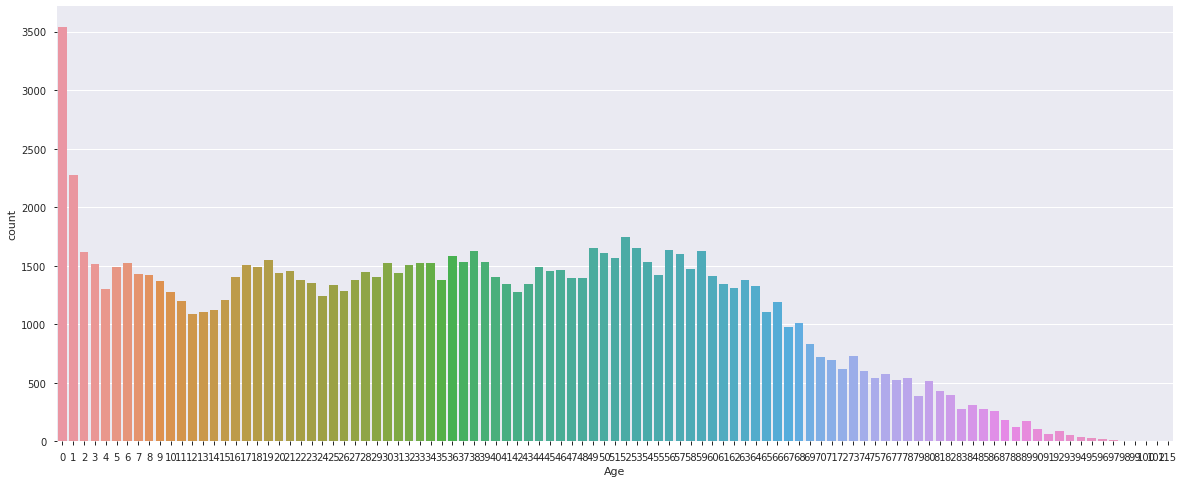

In [34]:
plt.figure(figsize=(20,8))
sns.countplot(x='Age',data=appt_data)

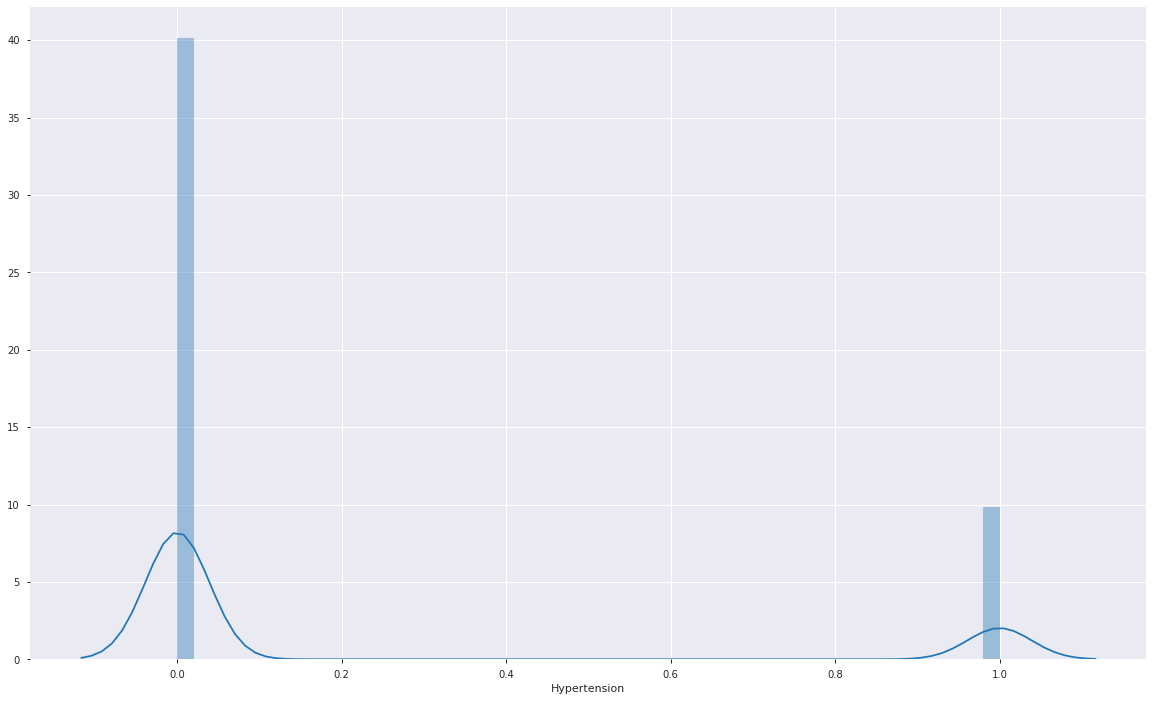

In [35]:
plt.figure(figsize=(20,12))
sns.distplot(appt_data['Hypertension'])

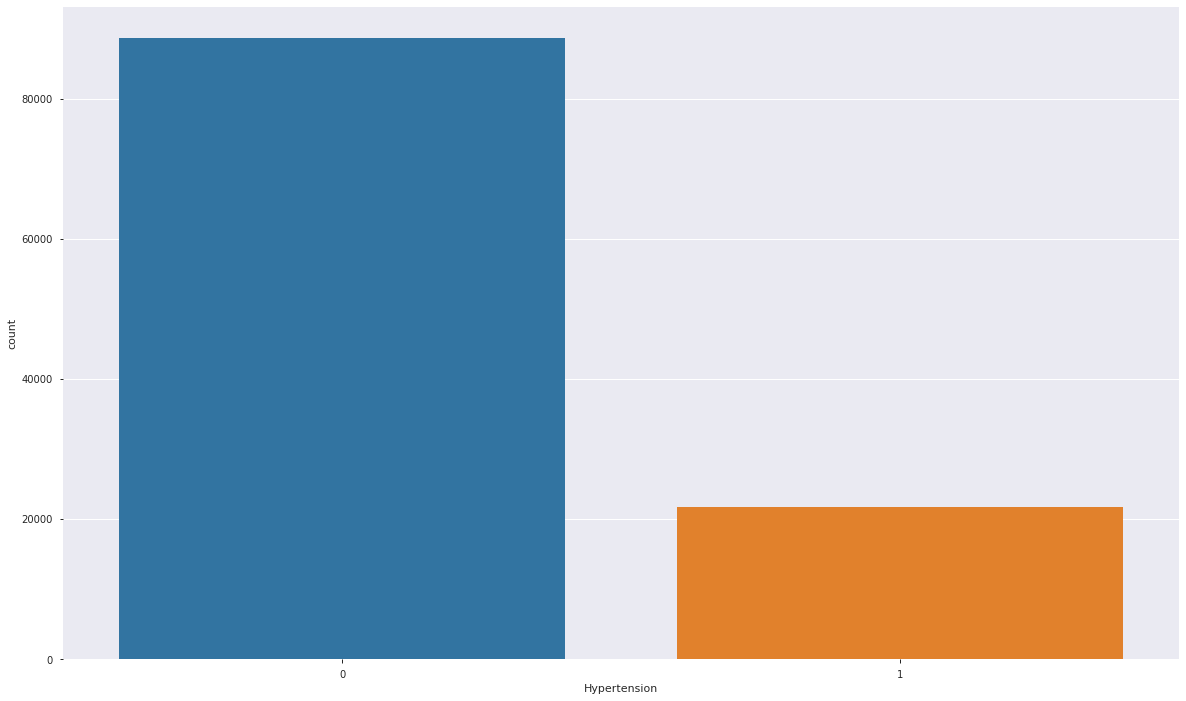

In [36]:
plt.figure(figsize=(20,12))
sns.countplot(appt_data['Hypertension'])

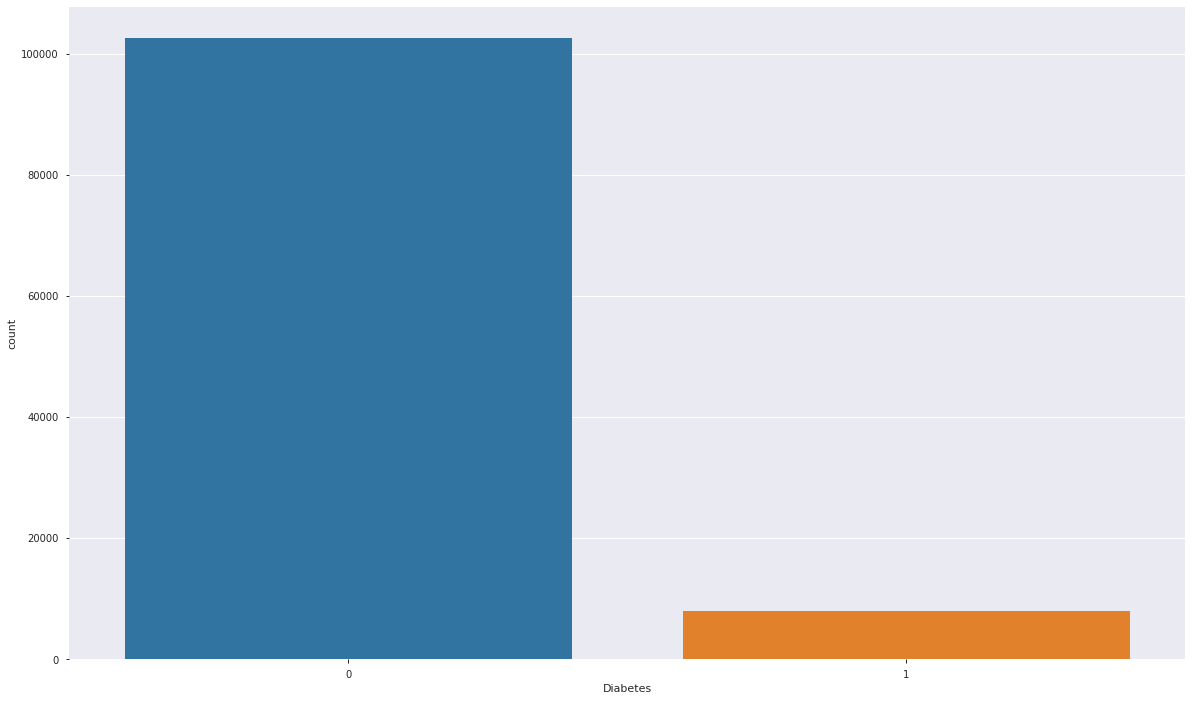

In [37]:
plt.figure(figsize=(20,12))
sns.countplot(appt_data['Diabetes'])

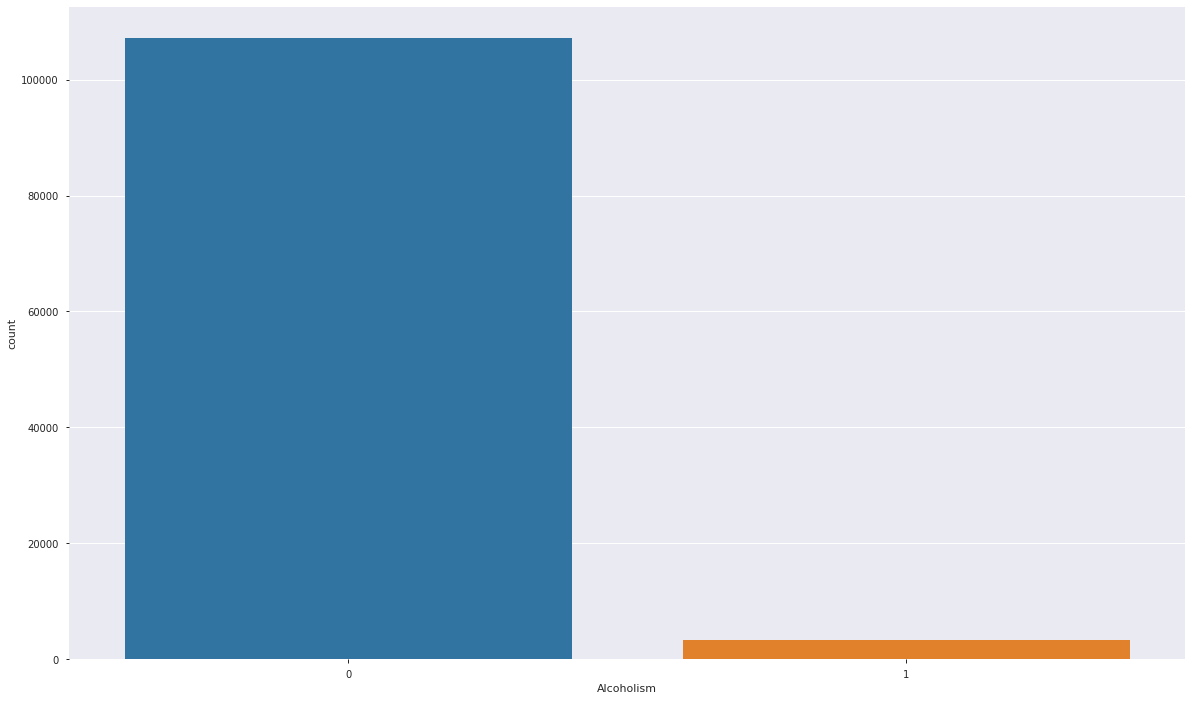

In [38]:
plt.figure(figsize=(20,12))
sns.countplot(appt_data['Alcoholism'])

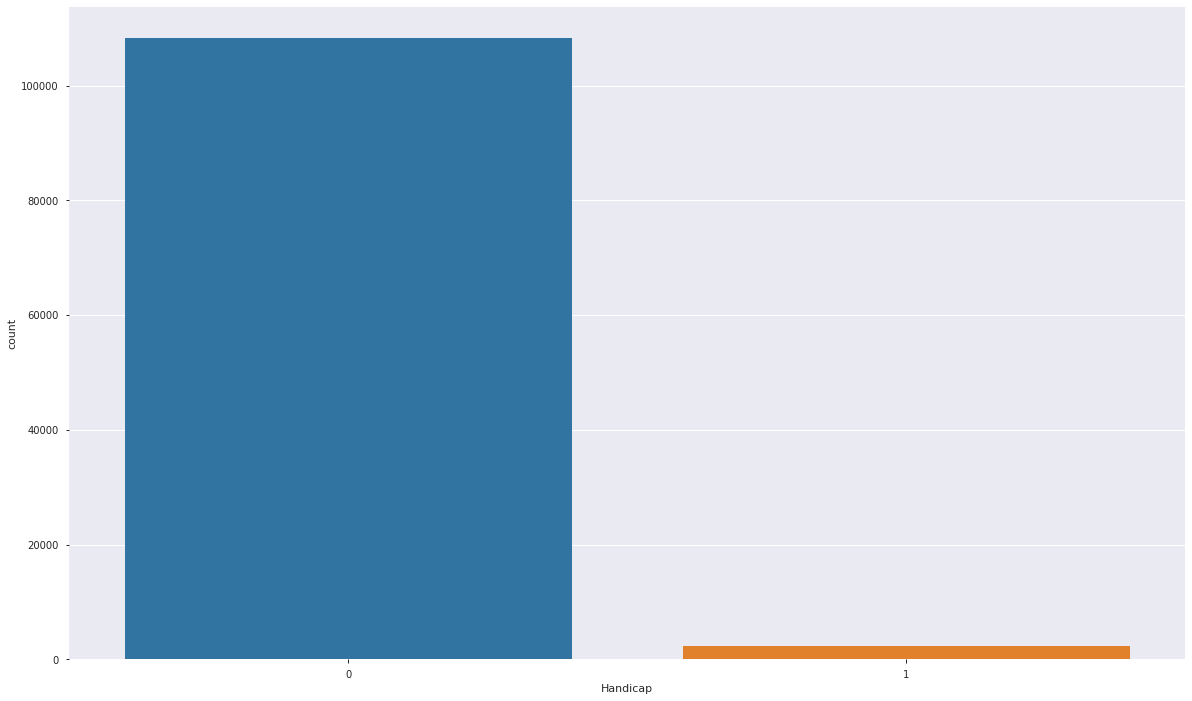

In [39]:
plt.figure(figsize=(20,12))
sns.countplot(appt_data['Handicap'])

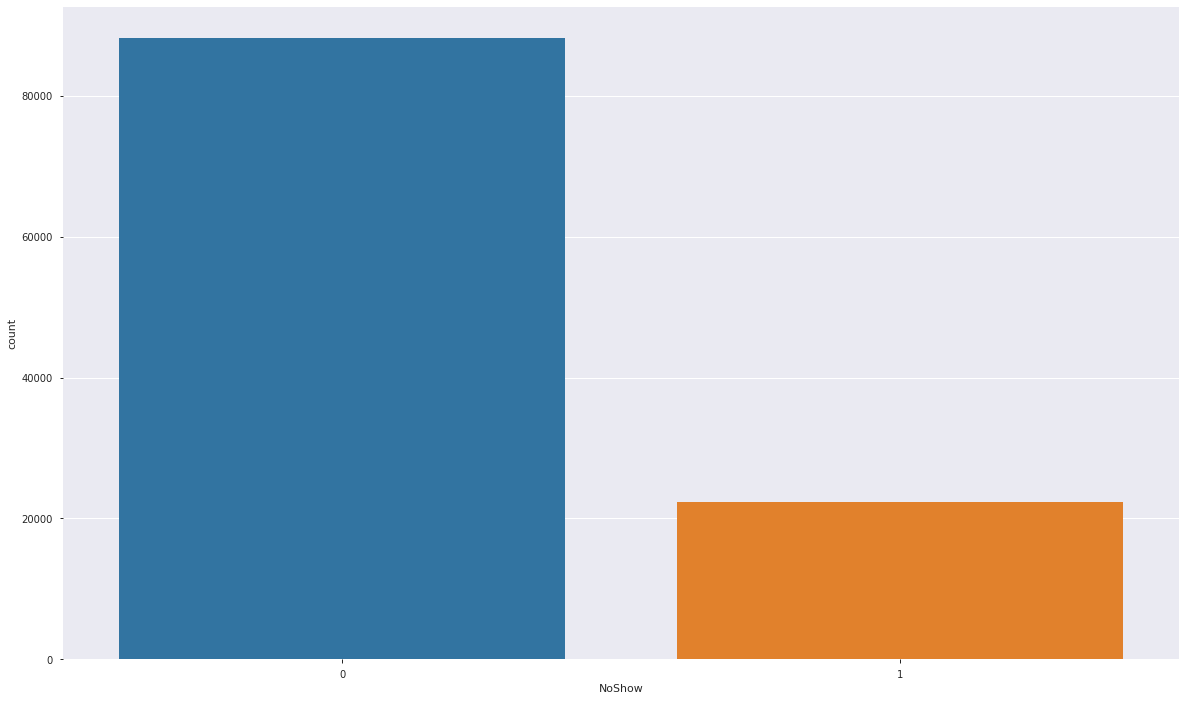

In [40]:
plt.figure(figsize=(20,12))
sns.countplot(appt_data['NoShow'])

In [41]:
#add cleaned appointment data to stage folder
filePath = os.path.join('Data','Stage','NoShowAppointments_cleaned.csv')
appt_data.to_csv(filePath,index=False)

In [42]:
#remove data from memory
del appt_data